In [1]:
import matplotlib.pyplot as plt
from vpython import *

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

First, the optical system must be set up. I chose the initial conditions where the object is 2 units away from the first lens, and I chose locations and focal lengths for all of the lenses. Then I calculated the distances of each object and image, the total length of the system, and the magnification of the final image. Since I'm interested in simulating the object, all 3 images, and all of the images' magnification, I created a list for each of these values to store their data.

In [2]:
# Declare variables
object_1_distance = 2   # distance from object to lens 1
lens_2_distance = 15    # distance from lens 1 to lens 2
lens_3_distance = 35    # distance from lens 2 to lens 3
focal_length_1 = 10     # focal length of lens 1
focal_length_2 = 30     # focal length of lens 2
focal_length_3 = 10     # focal length of lens 3

# Set up the lens equations
image_1_distance = (1 / focal_length_1 - 1 / object_1_distance) ** -1    # Position of the image from lens 1
object_2_distance = lens_2_distance - image_1_distance                   # Position of lens 2's object
image_2_distance = (1 / focal_length_2 - 1 / object_2_distance) ** -1    # Position of the image from lens 2
object_3_distance = lens_3_distance - image_2_distance                   # Position of lens 3's object
image_3_distance = (1 / focal_length_3 - 1 / object_3_distance) ** -1    # Position of the image from lens 3

# Calculate the magnification of the final image in relation to the initial object
magnification = -image_3_distance / object_3_distance

# Instantiate lists to be used in the animation
obj_dist_list = []
img_dist_list = []
lens_1_img_list = []
lens_2_img_list = []
lens_1_img_mag_list = []
lens_2_img_mag_list = []
mag_list = []

Now I can populate the lists with data. The number of times the while loop runs is arbitrary. I chose 2000 because this was the range I saw the most movement in the system. The image will change significantly as the objects moves near the lens' focal point. Before and after this point, the image remains pretty consistent (not much size change, distance, etc.)

In [3]:
while len(obj_dist_list) < 2000: 
    if object_1_distance == focal_length_1:    # object_1_distance appears to be infinite when object_1_distance = focal_length_1, so we choose object_2_distance to be 'infinitely far away' by setting it to be a large number
        object_2_distance = 1000000000
        
    else:
        image_1_distance = (1 / focal_length_1 - 1 / object_1_distance) ** -1
        object_2_distance = lens_2_distance - image_1_distance
    
    # Calculate the object / image distances at every step
    image_2_distance = (1 / focal_length_2 - 1 / object_2_distance) ** -1
    object_3_distance = lens_3_distance - image_2_distance
    image_3_distance = (1 / focal_length_3 - 1 / object_3_distance) ** -1
    magnification = -image_3_distance / object_3_distance

    # Append the calculated values to the animation lists
    obj_dist_list.append(object_1_distance)
    img_dist_list.append(image_3_distance)
    lens_1_img_list.append(image_1_distance)
    lens_2_img_list.append(image_2_distance)
    mag_list.append(magnification)
    lens_1_img_mag_list.append(-image_1_distance / object_1_distance)
    lens_2_img_mag_list.append((-image_2_distance / object_2_distance))

    object_1_distance += .01

Now I can plot the distance of the initial object vs the distnce of the final image, and the distance of the initial object vs the magnification of the final image. This will let me know when the object is crossing over the focal point of the optical system.

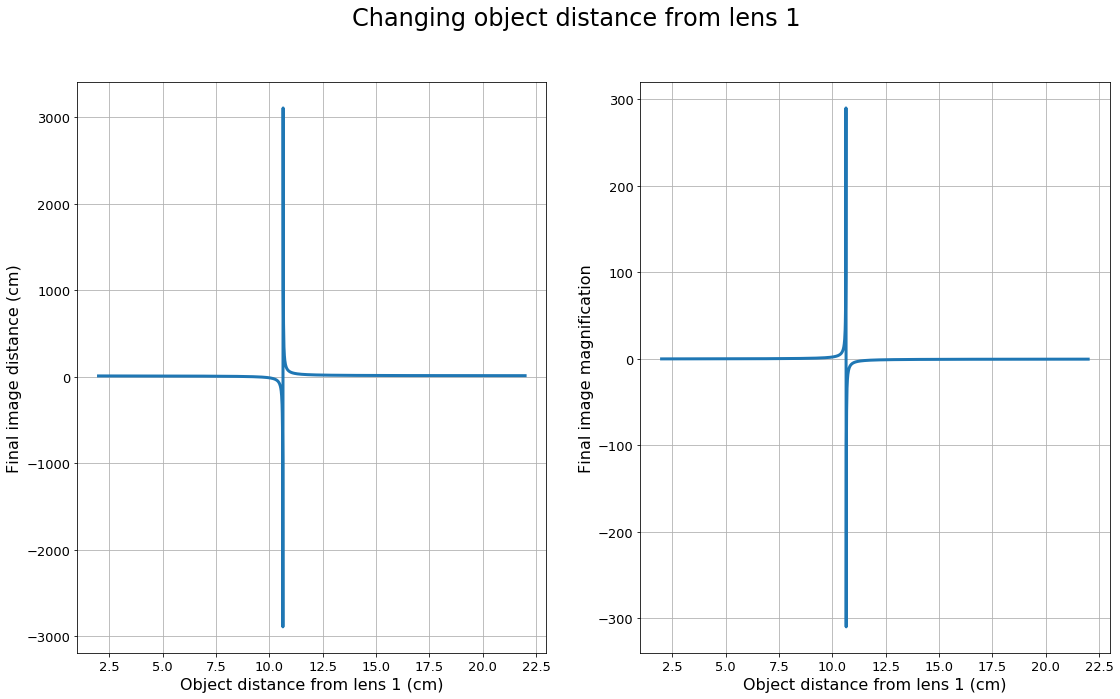

In [4]:
# Create sublots of Di vs Do, and magnification vs Do
figure, (Di_vs_Do, mag) = plt.subplots(1, 2)
Di_vs_Do.plot(obj_dist_list, img_dist_list, lw=3)
mag.plot(obj_dist_list, mag_list, lw=3)
# Set plot window size and title and save the image
figure = plt.gcf()
figure.set_size_inches(18.5, 10.5)
figure.suptitle('Changing object distance from lens 1', fontsize=24)
# Set mag labels and font sizes
mag.grid()
mag.set_xlabel('Object distance from lens 1 (cm)', fontsize=16)
mag.set_ylabel('Final image magnification', fontsize=16)
mag.tick_params(labelsize=13)
# Set Di_vs_Do labels and font sizes
Di_vs_Do.grid()
Di_vs_Do.set_xlabel('Object distance from lens 1 (cm)', fontsize=16)
Di_vs_Do.set_ylabel('Final image distance (cm)', fontsize=16)
Di_vs_Do.tick_params(labelsize=13)
plt.show()

The graphs show that the object moves over the focal point about halfway through its motion. This is a good range of motion for simulation purposes becuase this showcases the behavior of images as they appear infinitely far away. However, all of the specifications of the system could be tweaked in order to see the behavior of different systems. 
Start the animation!

In [5]:
# Initialize the animation window
scene.height = 200
scene.width = 950
scene.background = color.white
scene.userzoom = False
scene.autoscale = False
scene.center = vector(30, 0, 0)
scene.range = 12
scene.append_to_caption('Object Distance: %.2f' % obj_dist_list[0] + 'cm\t\tFinal Image Distance: %.2f' % img_dist_list[0] + 'cm\t\tMagnification: %.2f' % mag_list[0])

# Define the default orientation to be used in animating (where the object points upwards)
orientation = vector(0, 1, 0)

# Create objects representing the lenses
# Define the lens positions
lens_1_pos = vector(0, 0, 0)
lens_2_pos = vector(lens_2_distance, 0, 0)
lens_3_pos = vector(lens_2_distance + lens_3_distance, 0, 0)

# Create an upward and downward arrow to represent each lens
lens_1_a = arrow(pos=lens_1_pos, axis=orientation, color=color.black)
lens_1_b = arrow(pos=lens_1_pos, axis=-orientation, color=color.black)
lens_2_a = arrow(pos=lens_2_pos, axis=orientation, color=color.black)
lens_2_b = arrow(pos=lens_2_pos, axis=-orientation, color=color.black)
lens_3_a = arrow(pos=lens_3_pos, axis=orientation, color=color.black)
lens_3_b = arrow(pos=lens_3_pos, axis=-orientation, color=color.black)

# Create labels at the focal points of each lens
f1_label_a = label(pos=vector(focal_length_1, 0, 0), yoffset=-10, box=False, text='f1')
f1_label_b = label(pos=vector(-focal_length_1, 0, 0), yoffset=-10, box=False, text='f1')
f2_label = label(pos=vector(lens_2_distance + focal_length_2, 0, 0), yoffset=-10, box=False, text='f2')
f3_label = label(pos=vector(lens_2_distance + lens_3_distance + focal_length_3, 0, 0), yoffset=-10, box=False, text='f3')

# Initialize the animations of the object and object label
obj = arrow(pos=vector(-obj_dist_list[0], 0, 0), axis=orientation, color=color.red)
obj_label = label(pos=obj.pos, box=False, yoffset=-10, text='Object', color=obj.color)
# Initialize the animations of the final image and label
image = arrow(pos=vector(lens_2_distance + lens_3_distance + img_dist_list[0], 0, 0), axis=-orientation, length=abs(mag_list[0]), color=color.green)
img_label = label(pos=image.pos, box=False, xoffset=20, yoffset=20, text='Final Image', color=image.color)
# Initialize the animations of the lens 1 image and label
lens_1_image = arrow(pos=vector(lens_1_img_list[0], 0, 0), axis=orientation, color=color.blue)
lens_1_image_label = label(pos=lens_1_image.pos, box=False, xoffset=20, yoffset=20, text='Lens 1 Image', color=lens_1_image.color)
# Initialize the animations of the lens 2 image and label
lens_2_image = arrow(pos=vector(lens_2_distance + lens_2_img_list[0], 0, 0), axis=orientation, color=color.magenta)
lens_2_image_label = label(pos=lens_2_image.pos, box=False, xoffset=20, yoffset=-20, text='Lens 2 Image', color=lens_2_image.color)

# Pause so the animation window can open before the animation starts
time.sleep(2)

# Animation loop
# Loop through all of the values in obj_dist_list
for i in range(len(obj_dist_list)):
    # Set animation rate to refresh 80 times per second
    rate(80)

    # Update the object position
    obj_x_pos = -obj_dist_list[i]
    obj.pos = vector(obj_x_pos, 0, 0)
    obj_label.pos = obj.pos

    # Update the final image position, orientation, and size
    img_x_pos = img_dist_list[i]
    image.pos = vector(lens_2_distance + lens_3_distance + img_x_pos, 0, 0)
    img_label.pos = image.pos
    if mag_list[i] > 0:
        image.axis = orientation
    else:
        image.axis = -orientation
    image.length = abs(mag_list[i])

    # Update the lens 1 image position, orientation, and size
    lens_1_img_x_pos = lens_1_img_list[i]
    lens_1_image.pos = vector(lens_1_img_x_pos, 0, 0)
    lens_1_image_label.pos = lens_1_image.pos
    if lens_1_img_mag_list[i] > 0:
        lens_1_image.axis = orientation
    else:
        lens_1_image.axis = -orientation
    lens_1_image.length = abs(lens_1_img_mag_list[i])

    # Update the lens 2 image position, orientation, and size
    lens_2_img_x_pos = lens_2_img_list[i]
    lens_2_image.pos = vector(lens_2_distance + lens_2_img_x_pos, 0, 0)
    lens_2_image_label.pos = lens_2_image.pos
    if lens_2_img_mag_list[i] > 0:
        lens_2_image.axis = orientation
    else:
        lens_2_image.axis = -orientation
    lens_2_image.length = abs(lens_2_img_mag_list[i])

    #Update the caption
    scene.caption = ''
    scene.append_to_caption('Object Distance: %.2f' % obj_dist_list[i] + 'cm\t\tFinal Image Distance: %.2f' % img_dist_list[i] + 'cm\t\tMagnification: %.2f' % mag_list[i])

The animation plays at the top of the notebook. Try tweaking the system specifications and see how it changes the simulation.